<a href="https://colab.research.google.com/github/elimelt/python-scripts/blob/main/cool-algorithms/stable_matchings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Consider EVERY possible instance of the stable matching problem.

No, not every possible matching. Rather, every possible preference
of applicants, i.e. the entire problem space for stable matching.

I calculated the distribution of first choice pairs in all instances
for n = 3
"""

In [1]:
from itertools import permutations, product

def is_stable_matching(company_prefs, applicant_prefs, matching):
    imatching = { v:k for k, v in matching.items() }
    for company, applicant in matching.items():
        company_index = company_prefs[company].index(applicant)
        for other_applicant in company_prefs[company][:company_index]:
            # print(other_applicant, imatching)
            if applicant_prefs[other_applicant].index(company) < applicant_prefs[other_applicant].index(imatching[other_applicant]):
                return False
    return True

def find_stable_matchings(company_prefs, applicant_prefs):
    matchings = []
    for perm in permutations(applicant_prefs.keys()):
        matching = dict(zip(company_prefs.keys(), perm))
        if is_stable_matching(company_prefs, applicant_prefs, matching):
            matchings.append(matching)
    return matchings


A1, A2, A3, A4 = 'A1', 'A2', 'A3', 'A4'
C1, C2, C3, C4 = 'C1', 'C2', 'C3', 'C4'

def generate_preferences():

    company_labels = [C1, C2, C3]
    applicant_labels = [A1, A2, A3]
    n = len(company_labels)
    cperms = list(permutations(company_labels))
    aperms = list(permutations(applicant_labels))

    cprod = product(*([cperms] * n))
    aprod = product(*([aperms] * n))

    c = [ dict(zip(applicant_labels, c)) for c in cprod ]
    a = [ dict(zip(company_labels, a)) for a in aprod ]

    return c, a

company_prefs = {
    C1: [A1, A2, A3],
    C2: [A2, A3, A1],
    C3: [A3, A1, A2]
}

applicant_prefs = {
    A1: [C2, C3, C1],
    A2: [C3, C1, C2],
    A3: [C1, C2, C3]
}

all_c, all_a = generate_preferences()

data = []
res = []
for c in all_c:
  for a in all_a:

    stable_matchings = find_stable_matchings(c, a)
    curr = 0
    for matching in stable_matchings:
      imatching = { v: k for k, v in matching.items() }
      match_dict = dict(matching)
      match_dict.update(imatching)

      data.append((c, a, matching))

      for co, pref in c.items():
        if pref[0] == match_dict[co]:
          curr += 1

      # for ap, pref in a.items():
      #   if pref[0] == match_dict[ap]:
      #     curr += 1

    res.append((curr, a, c, stable_matchings))


candidates = []

for i in range(len(res)):
  if res[i][0] == 0:
    candidates.append(res[i])

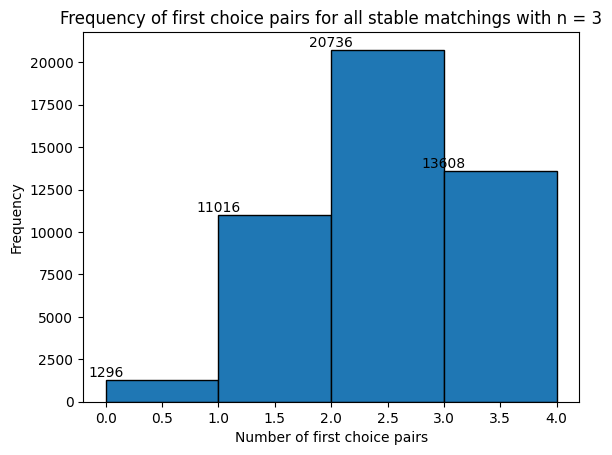

In [2]:
import matplotlib.pyplot as plt

r = [c[0] for c in res]

counts, bins, _ = plt.hist(r, bins=range(min(r), max(r) + 1), edgecolor='black')

plt.xlabel('Number of first choice pairs')
plt.ylabel('Frequency')
plt.title('Frequency of first choice pairs for all stable matchings with n = 3')

for count, bin in zip(counts, bins):
    plt.text(bin, count, str(int(count)), ha='center', va='bottom')

plt.show()